<a href="https://colab.research.google.com/github/Rajeshgit-R/analyzing_studentperformance_project/blob/main/analyzing_studentperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("/content/drive/MyDrive/Data/StudentsPerformance.csv")

In [3]:
data.shape

(1000, 8)

In [4]:
data.head()

,gender,category,levelofeducation,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.isnull().sum().sum()

0

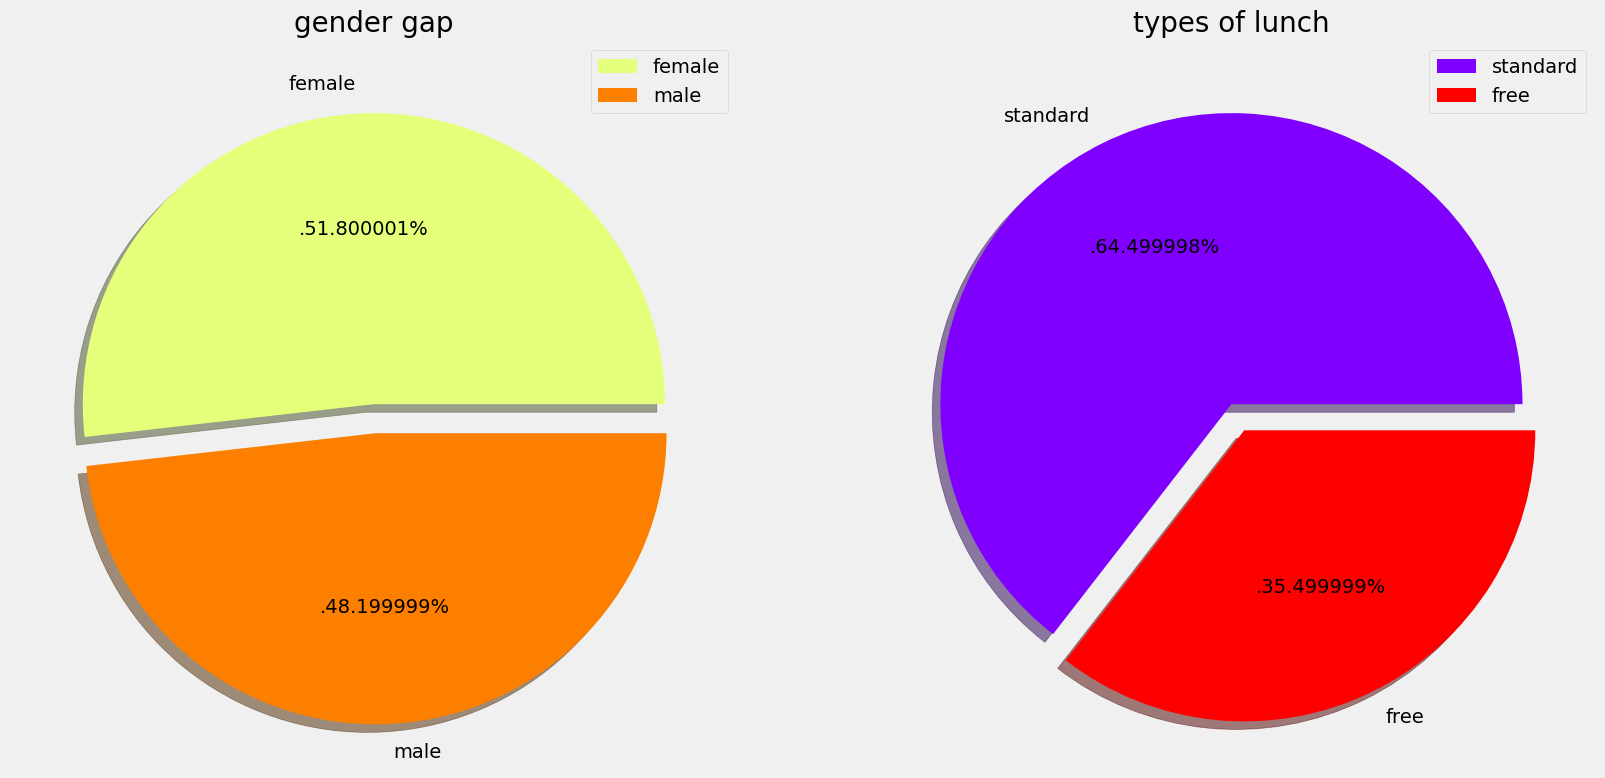

In [7]:
#visualising the number of male and female in the dataset
plt.rcParams["figure.figsize"]=(18,8)

plt.subplot(1,2,1)
size=data["gender"].value_counts()
labels="female","male"
color=plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]

plt.pie(size,colors=color,explode=explode,labels=labels,shadow=True,autopct=".%2f%%")
plt.title("gender gap",fontsize=20)
plt.axis("off")
plt.legend()

plt.subplot(1,2,2)
size=data["lunch"].value_counts()
labels="standard","free"
color=plt.cm.rainbow(np.linspace(0,1,2))
explode=[0,0.1]

plt.pie(size,colors=color,explode=explode,labels=labels,shadow=True,autopct=".%2f%%")
plt.title("types of lunch",fontsize=20)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()

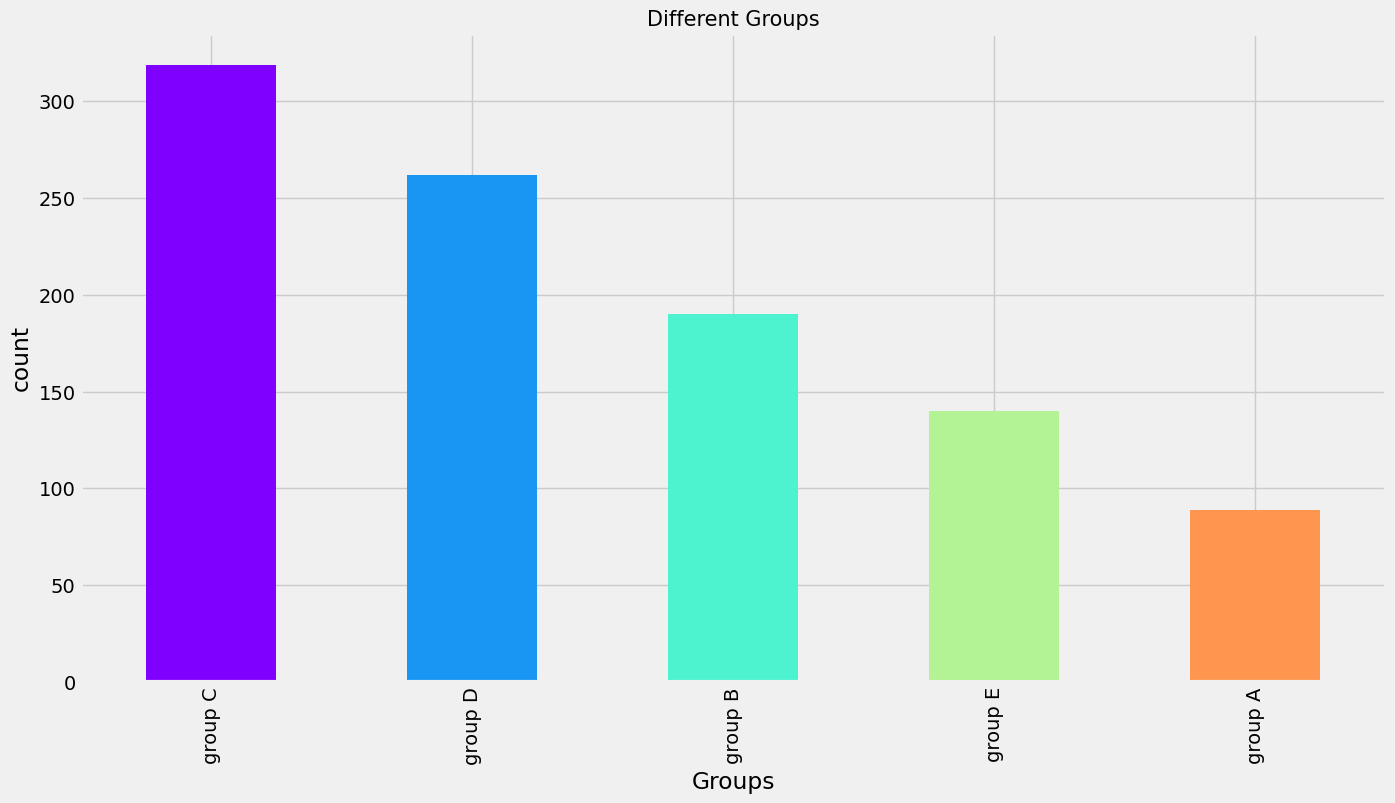

In [8]:
#visualising the different groups in the dataset

plt.rcParams["figure.figsize"] = (15, 8)
color = plt.cm.rainbow(np.linspace(0, 1, 6))
data["category"].value_counts(dropna = False).plot.bar(color = color)
plt.title("Different Groups", fontsize = 15)
plt.xlabel("Groups")
plt.ylabel("count")
plt.show()

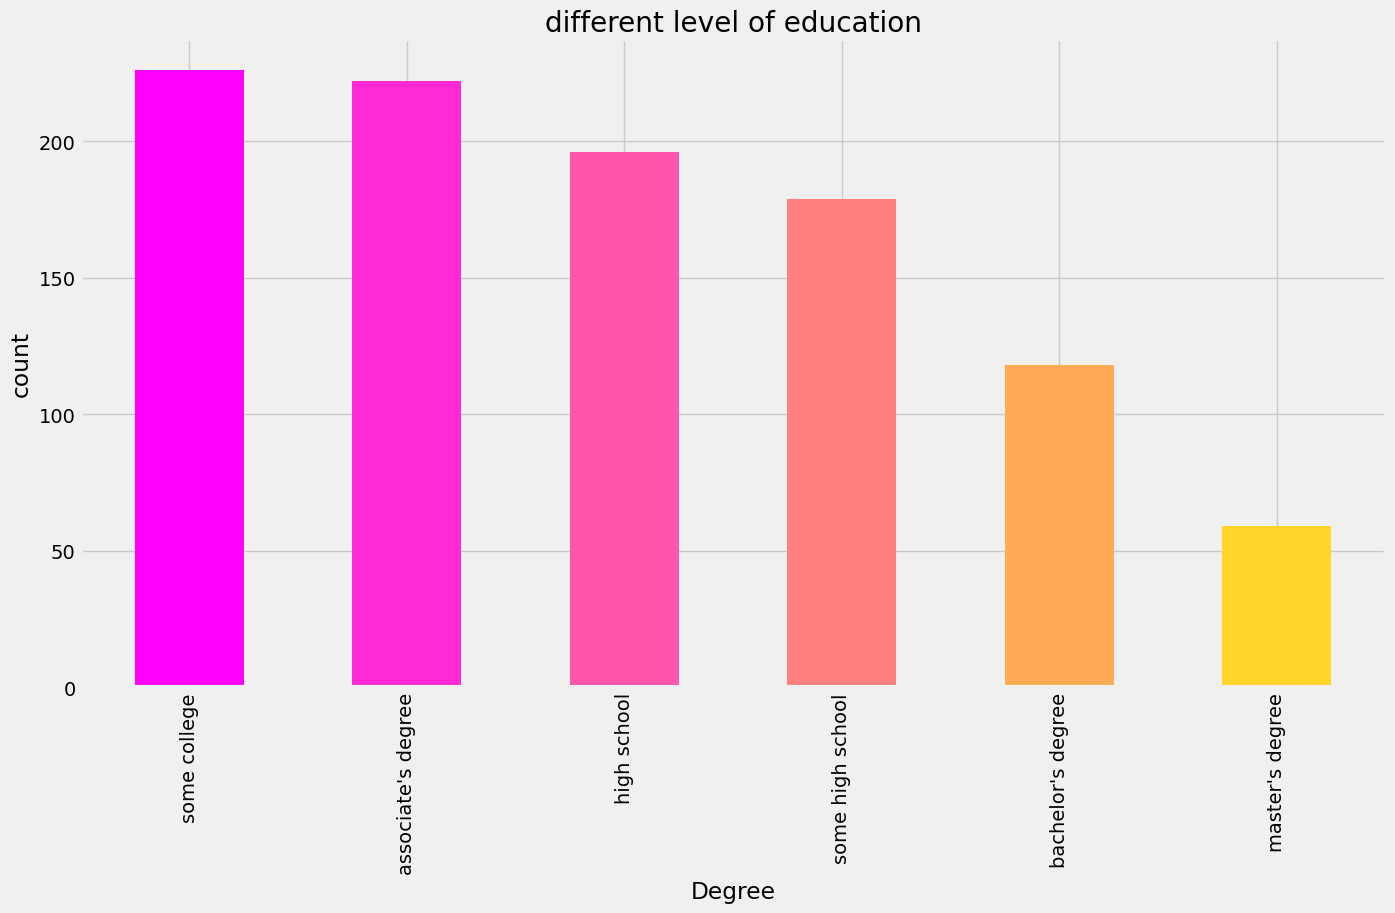

In [9]:
#visualising the different level of education
plt.rcParams["figure.figsize"]=(15,8)
color=plt.cm.spring(np.linspace(0,1,7))
data["levelofeducation"].value_counts(dropna=False).plot.bar(color=color)
plt.title("different level of education")
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

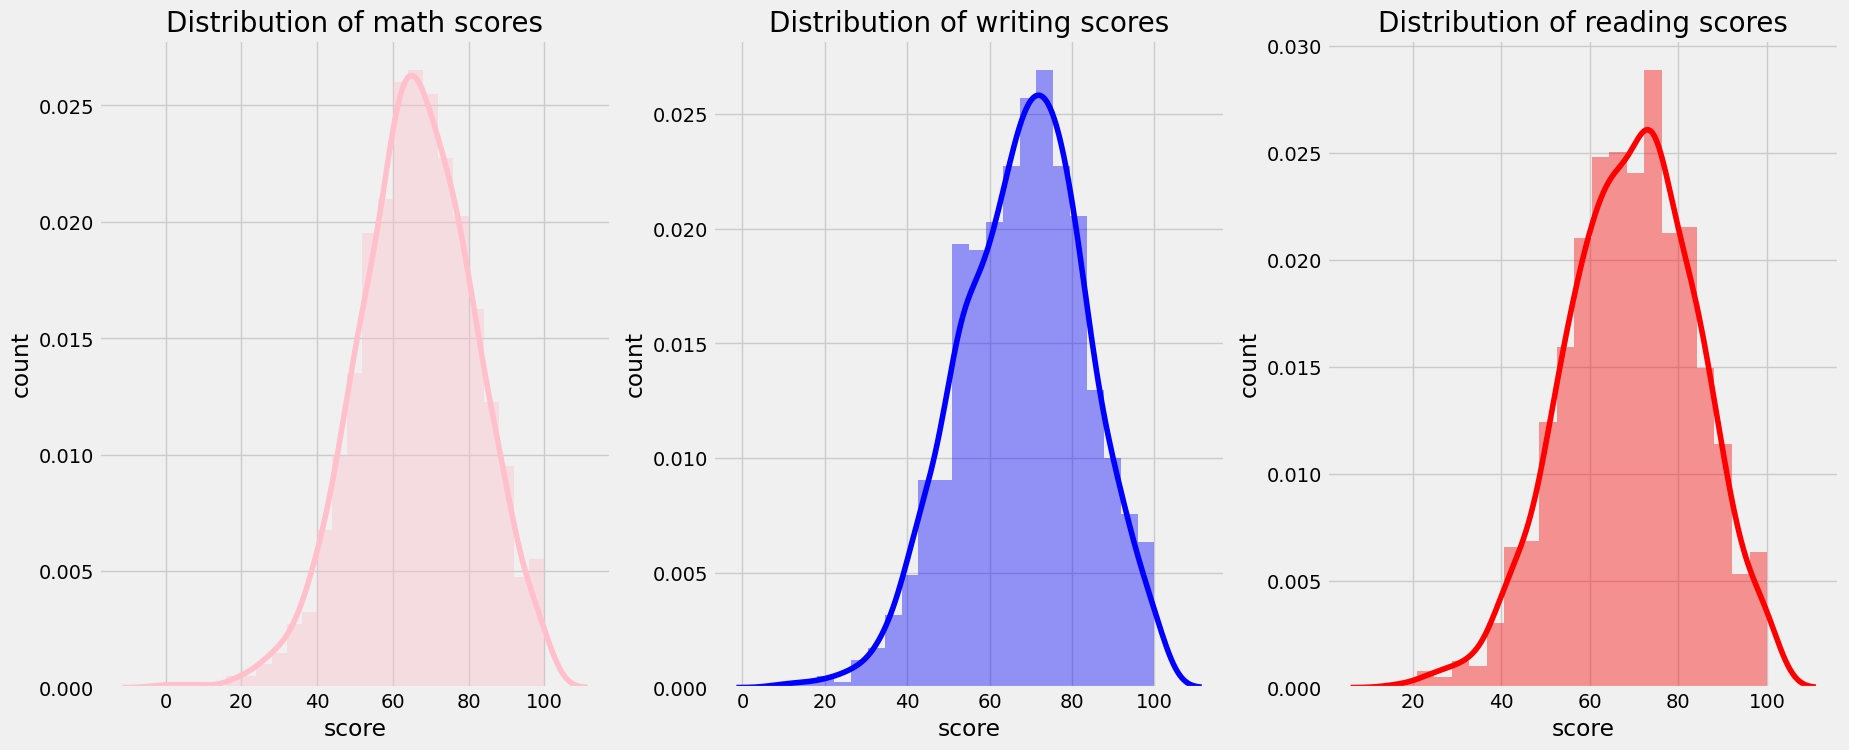

In [10]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 3, 1)
sns.distplot(data['math score'], color = 'pink')
plt.title('Distribution of math scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.distplot(data['writing score'], color = 'blue')
plt.title('Distribution of writing scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.distplot(data['reading score'], color = 'red')
plt.title('Distribution of reading scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.show()

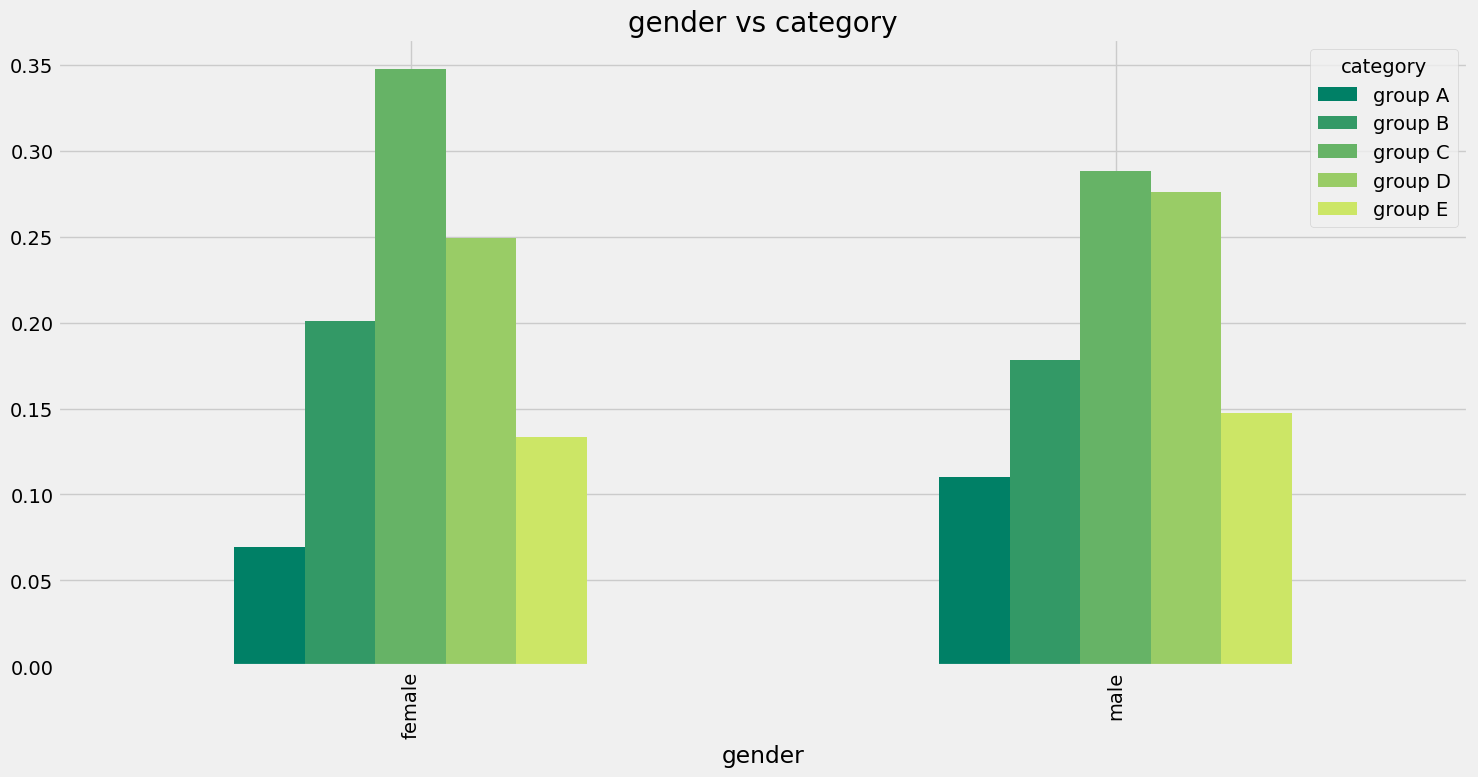

In [11]:
#gender vs category
x=pd.crosstab(data["gender"],data["category"])
x.div(x.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False,figsize=(15,8),
              color=plt.cm.summer(np.linspace(0,1,6)))
plt.title("gender vs category",fontsize=20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

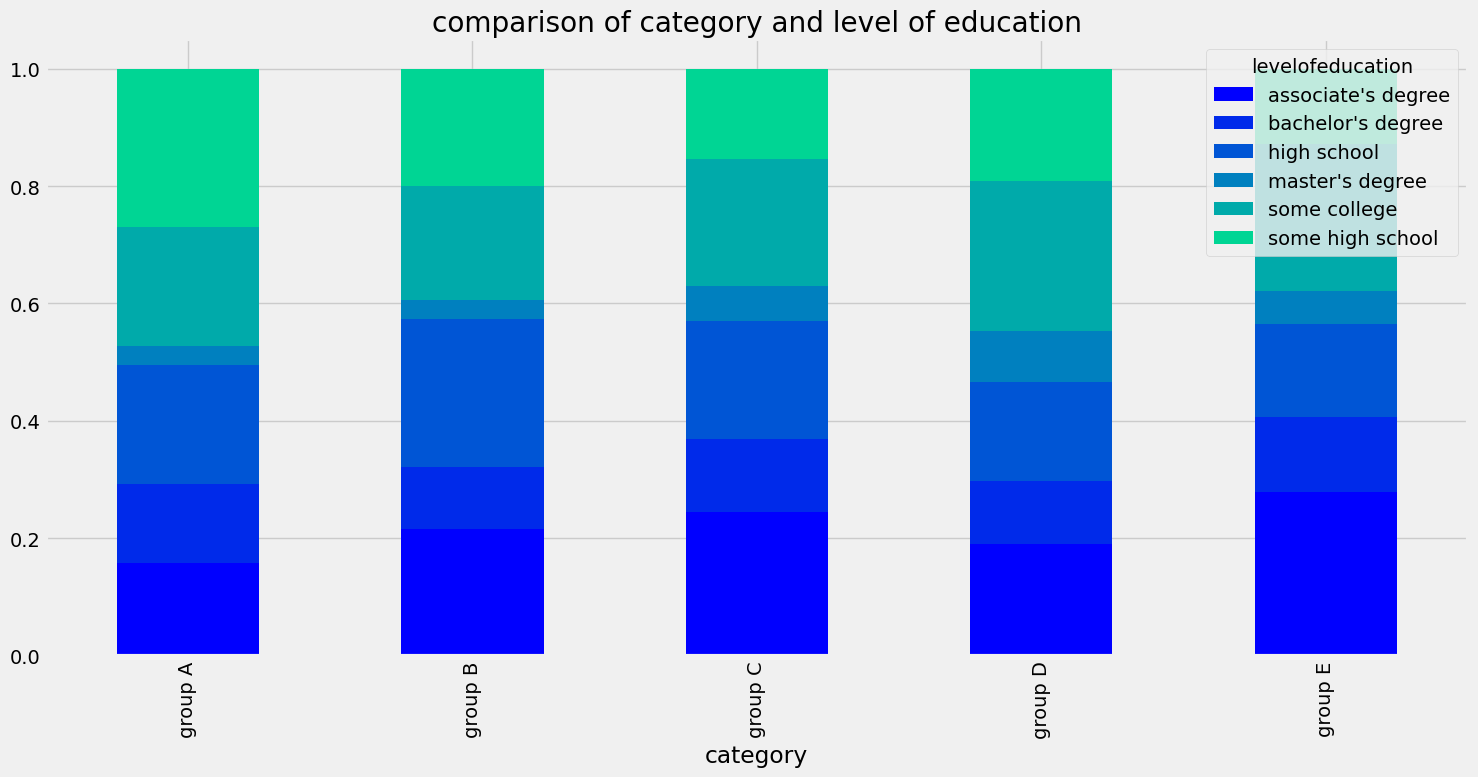

In [12]:
#comparison of category and level of education
x=pd.crosstab(data["category"],data["levelofeducation"])
x.div(x.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(15,8),color=plt.cm.winter(np.linspace(0,1,7)))
plt.title("comparison of category and level of education")
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

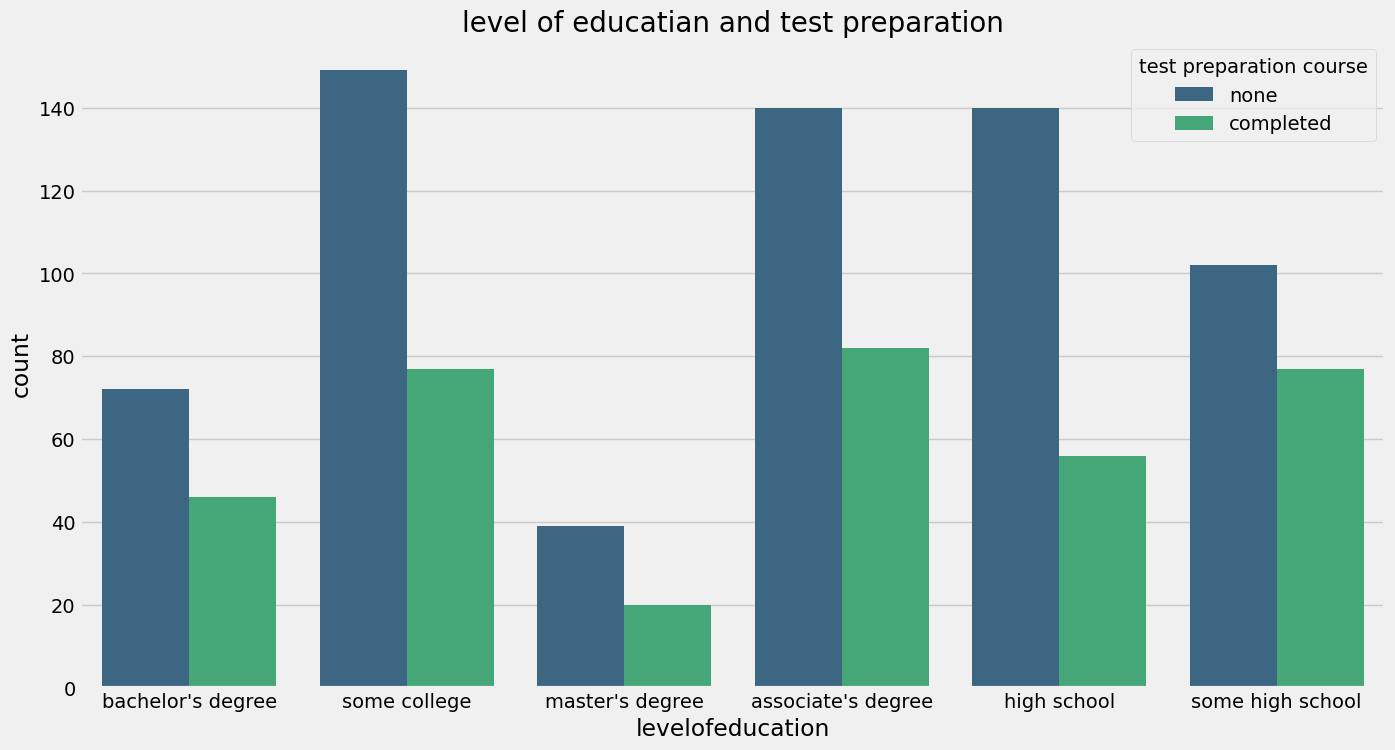

In [13]:
#comparison of level of education and test prepation course

plt.rcParams["figure.figsize"]=(15,8)
sns.countplot(x="levelofeducation",data=data,hue="test preparation course",palette="viridis")
plt.title("level of educatian and test preparation",fontsize=20)
plt.show()

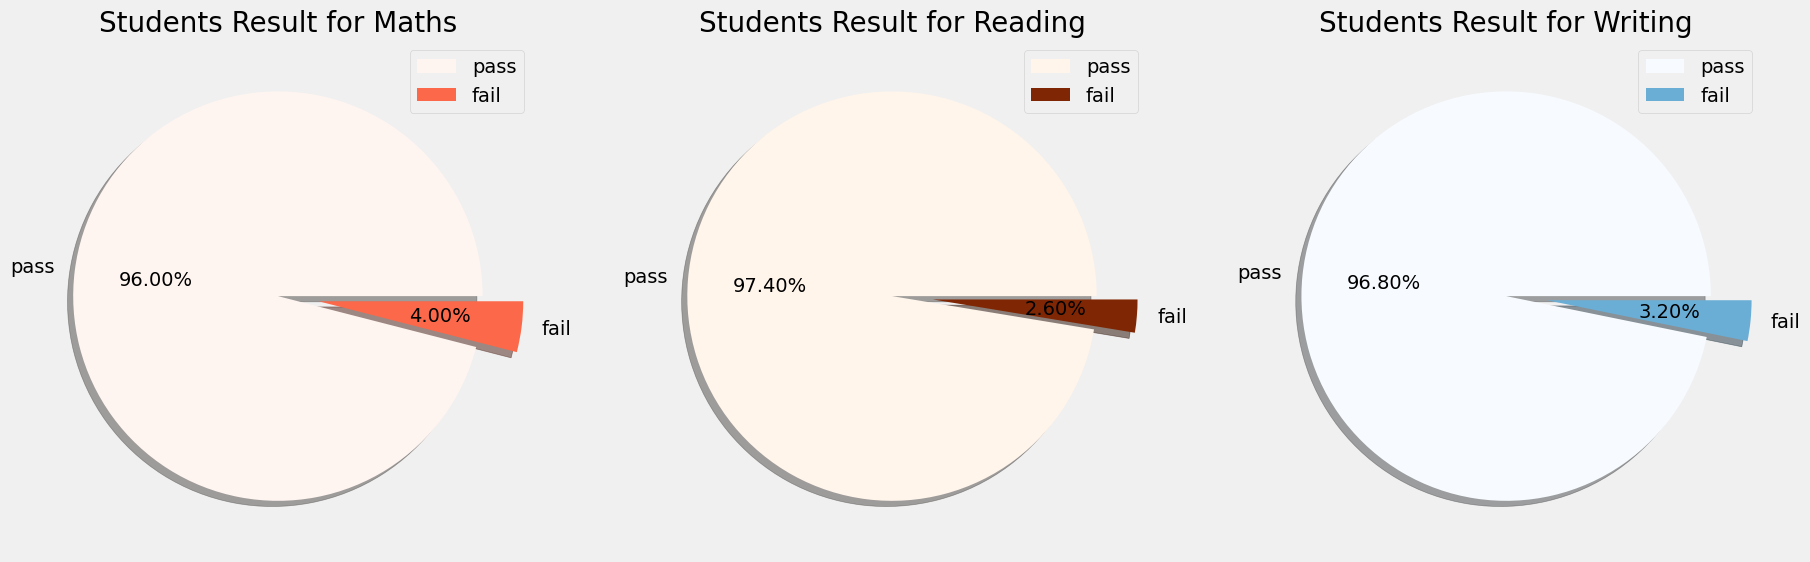

In [14]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
plt.rcParams['figure.figsize'] = (20, 10)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data["pass_in_math"] = np.where(data["math score"]< passmarks, "Fail", "Pass")
data["pass_in_reading"] = np.where(data["reading score"]< passmarks, "Fail", "Pass")
data["pass_in_writing"] = np.where(data["writing score"]< passmarks, "Fail", "Pass")

# pie chart to represent the ratio of pass and fail status between the students

size = data["pass_in_math"].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = "%.2f%%", explode = explode, shadow = True)
plt.title("Students Result for Maths", fontsize = 20)
plt.legend()

size = data["pass_in_reading"].value_counts()
colors = plt.cm.Oranges(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = "%.2f%%", explode = explode, shadow = True)
plt.title("Students Result for Reading", fontsize = 20)
plt.legend()

size = data["pass_in_writing"].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = "%.2f%%", explode = explode, shadow = True)
plt.title("Students Result for Writing", fontsize = 20)
plt.legend()


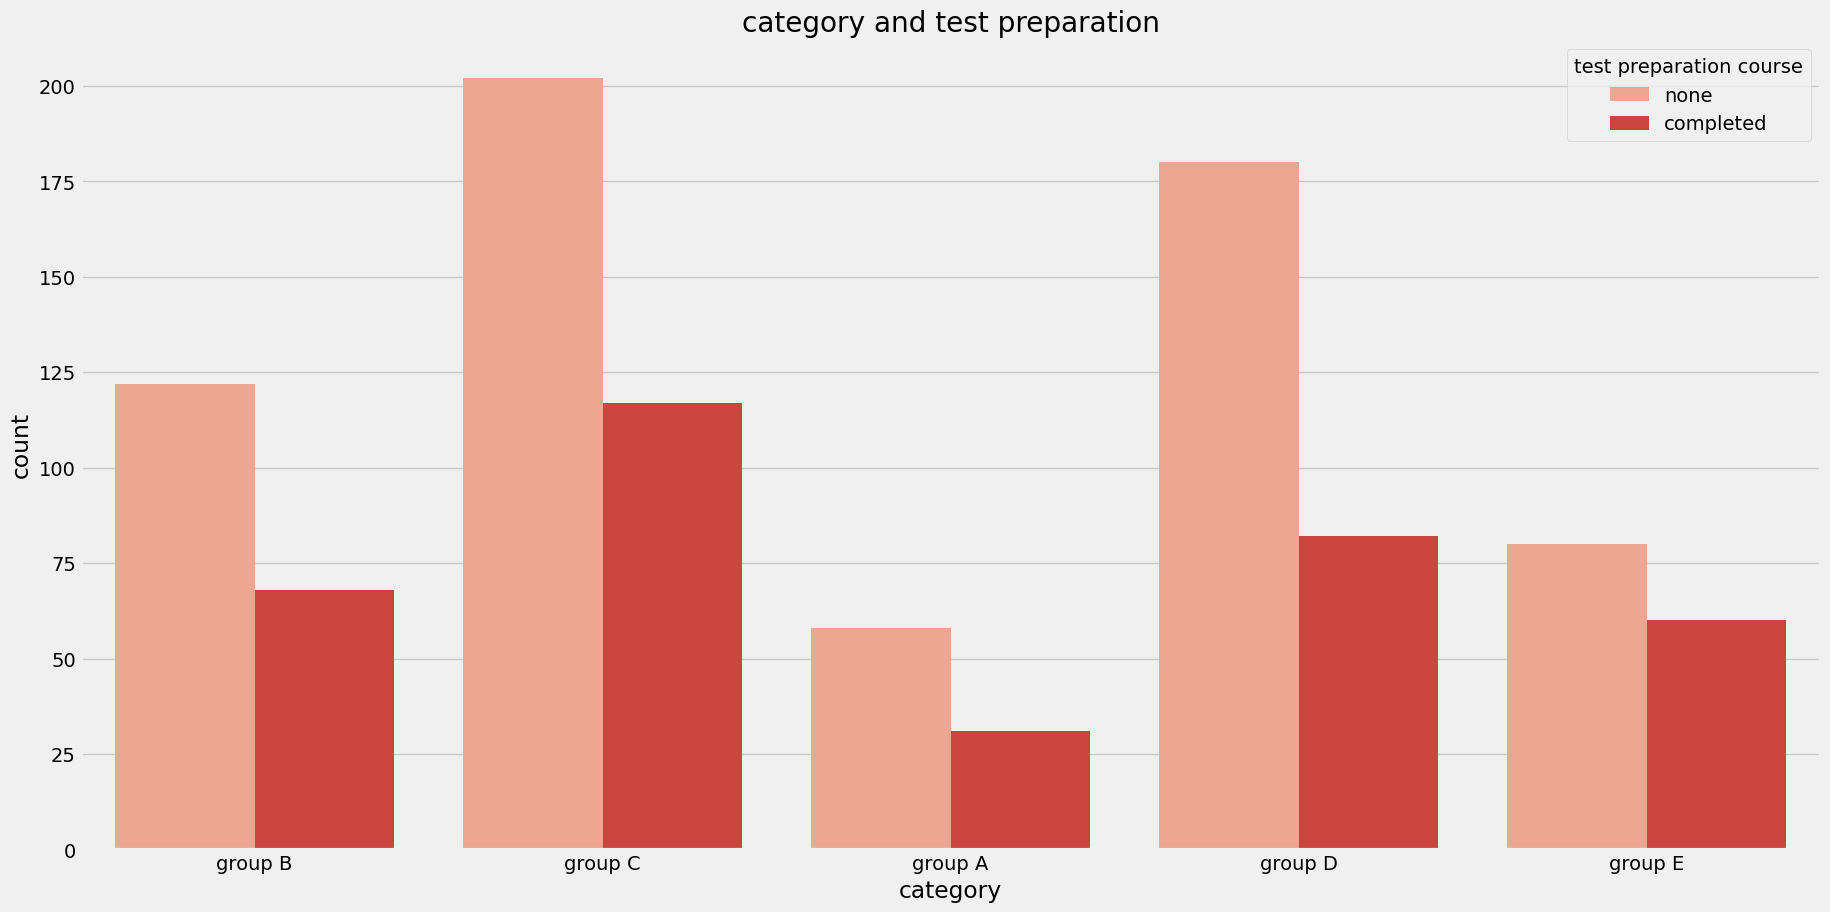

In [15]:
#comparison of category and test preparation course
sns.countplot(x="category",data=data,hue="test preparation course",palette="Reds")
plt.title("category and test preparation")
plt.show()

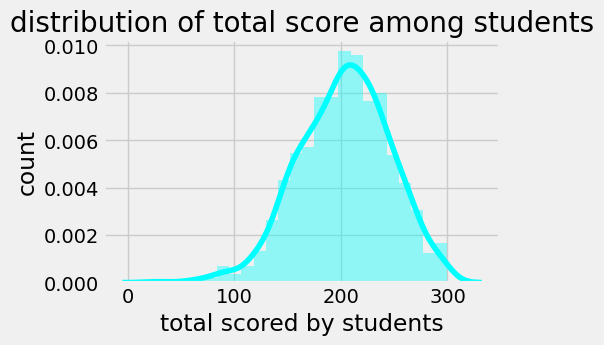

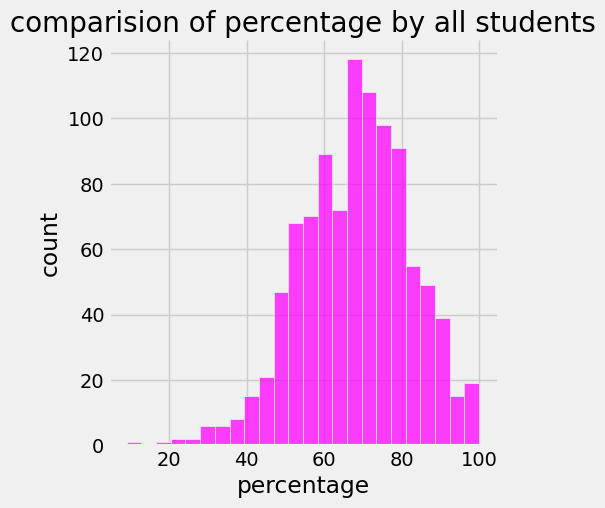

In [16]:
#computing the total score for each student
from math import *
data["total score"]=data["math score"]+data["reading score"]+data["writing score"]
data["percentage"]=data["total score"]/3
for i in range(0,1000):
  data["percentage"][i]=ceil(data["percentage"][i])

plt.rcParams["figure.figsize"]=(10,3)

plt.subplot(1,2,1)
sns.distplot(data["total score"],color="cyan")
plt.title("distribution of total score among students",fontsize=20)
plt.xlabel("total scored by students")
plt.ylabel("count")

plt.subplot(1,2,1)
sns.displot(data["percentage"],color="magenta")
plt.title("comparision of percentage by all students",fontsize=20)
plt.xlabel("percentage")
plt.ylabel("count")
plt.show()
plt.show()




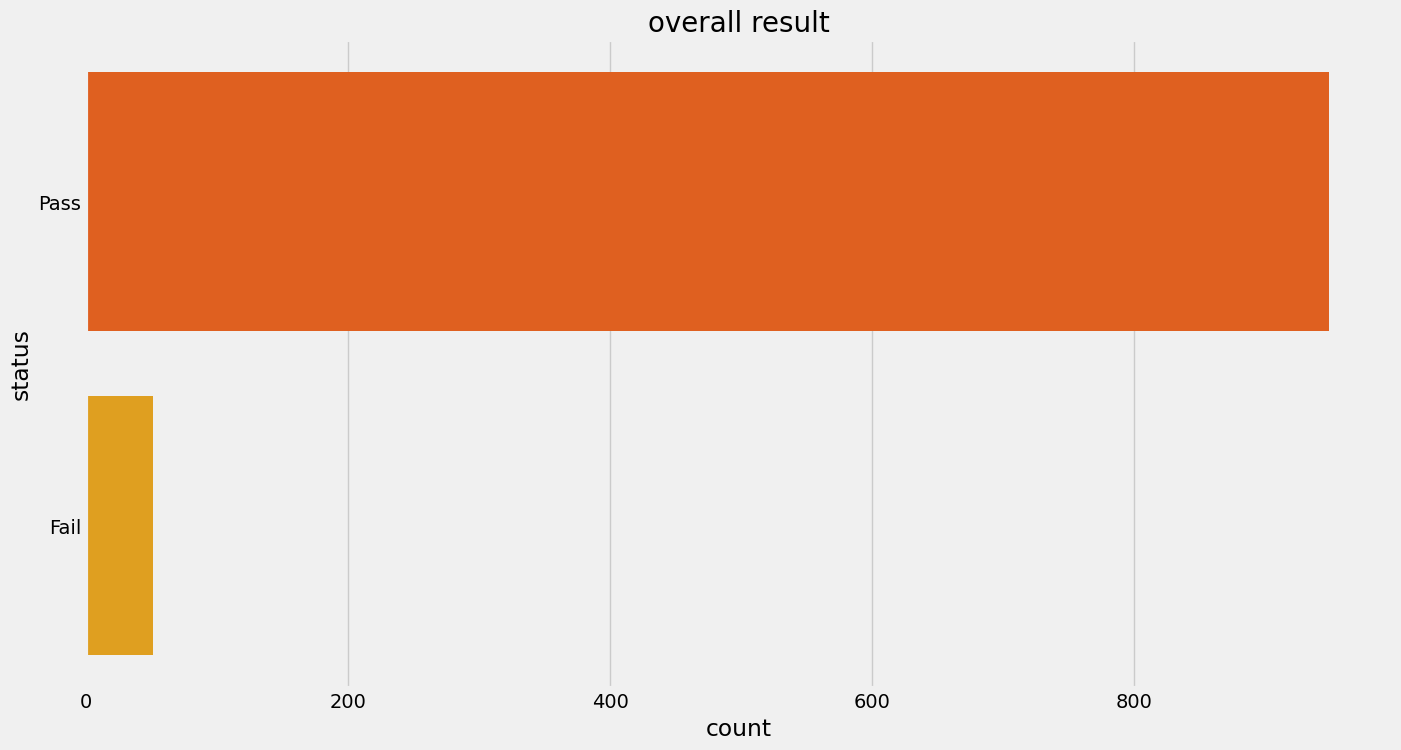

In [17]:
#checking wich students fail overall
data["status"]=data.apply(lambda x:"Fail" if x["pass_in_math"]=="Fail" or x["pass_in_reading"]=="Fail"
                    or x["pass_in_writing"]=="Fail" else "Pass",axis=1)

plt.rcParams["figure.figsize"]=(15,8)
sns.countplot(data["status"],palette="autumn")
plt.title("overall result",fontsize=20)
plt.xlabel("count")
plt.ylabel("status")
plt.show()

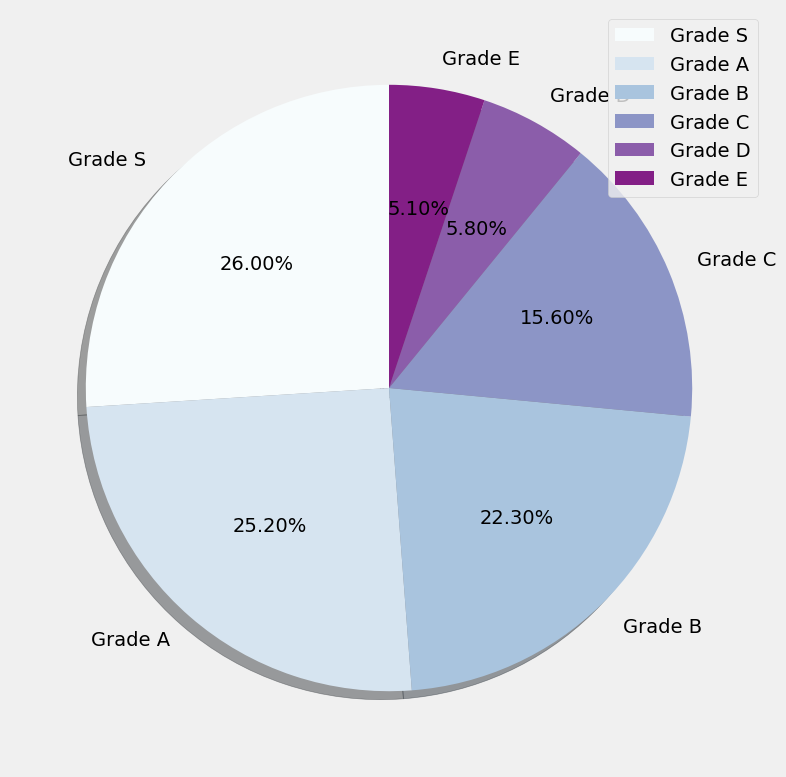

In [18]:
#Assigning the grades
def getgrade(percentage,status):
  if status=="Fail":
    return "E"
  if percentage >=90:
    return "S"
  if percentage >=80:
    return "A"
  if percentage >=70:
    return "B"
  if percentage >=60:
    return "c"
  if percentage >=40:
    return "D"
  else:
    return "E"

data["grades"]=data.apply(lambda x:getgrade(x["percentage"],x["status"]),axis=1)

labels=["Grade S","Grade A","Grade B","Grade C","Grade D","Grade E"]
sizes=data["grades"].value_counts()
colors=plt.cm.BuPu(np.linspace(0,1,7))
explode=(0.0001,0.0001,0.0001,0.0001,0.0001,0.0001)

plt.pie(sizes,colors=colors,labels=labels,shadow=True,autopct="%.2f%%",startangle=90)
plt.legend(loc="upper right")
plt.axis("off")
plt.tight_layout()
plt.show()

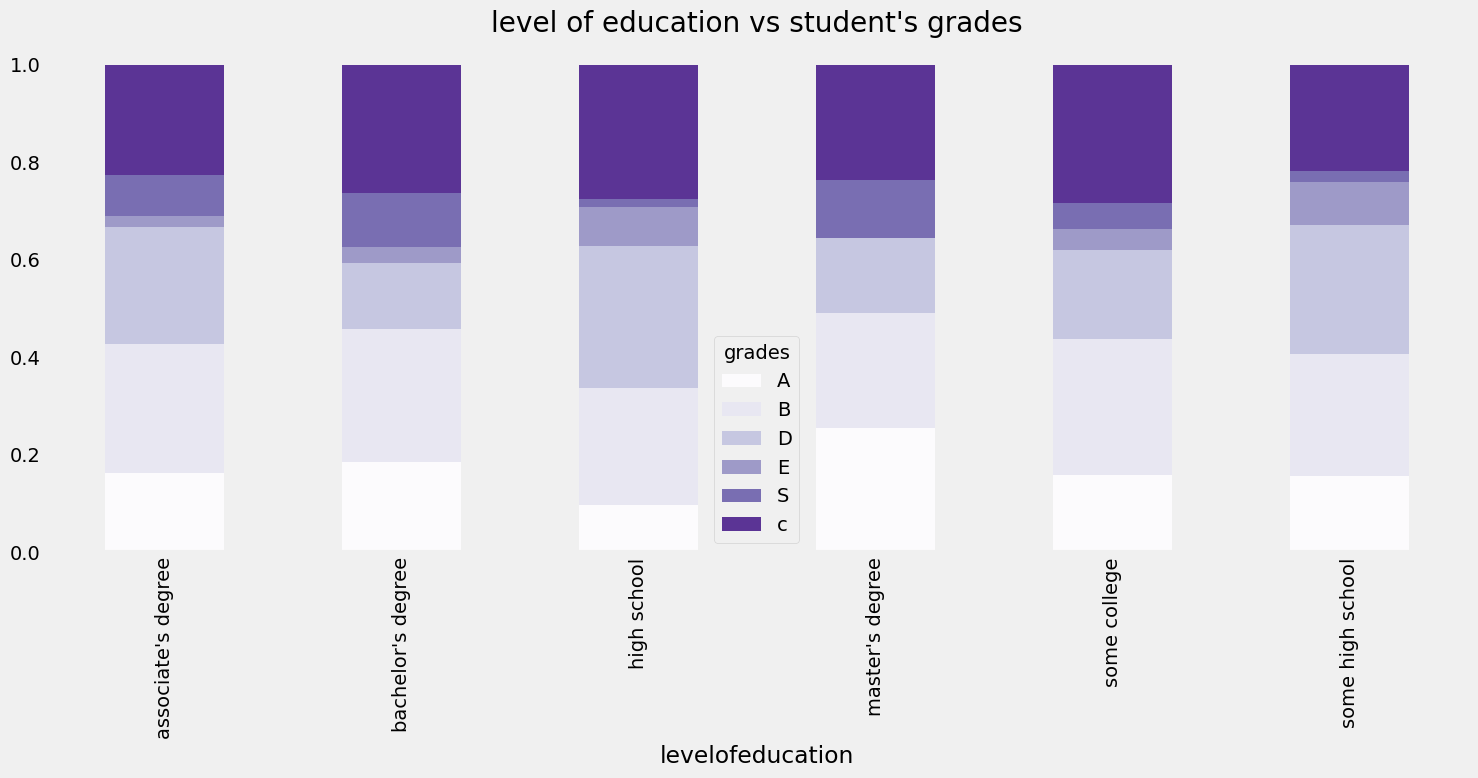

In [19]:
#comparison of level of education and grades
x=pd.crosstab(data["levelofeducation"],data["grades"])
x.div(x.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(15,8),color=plt.cm.Purples(np.linspace(0,1,7)))

plt.title("level of education vs student's grades")
plt.grid()
plt.tight_layout()
plt.show()

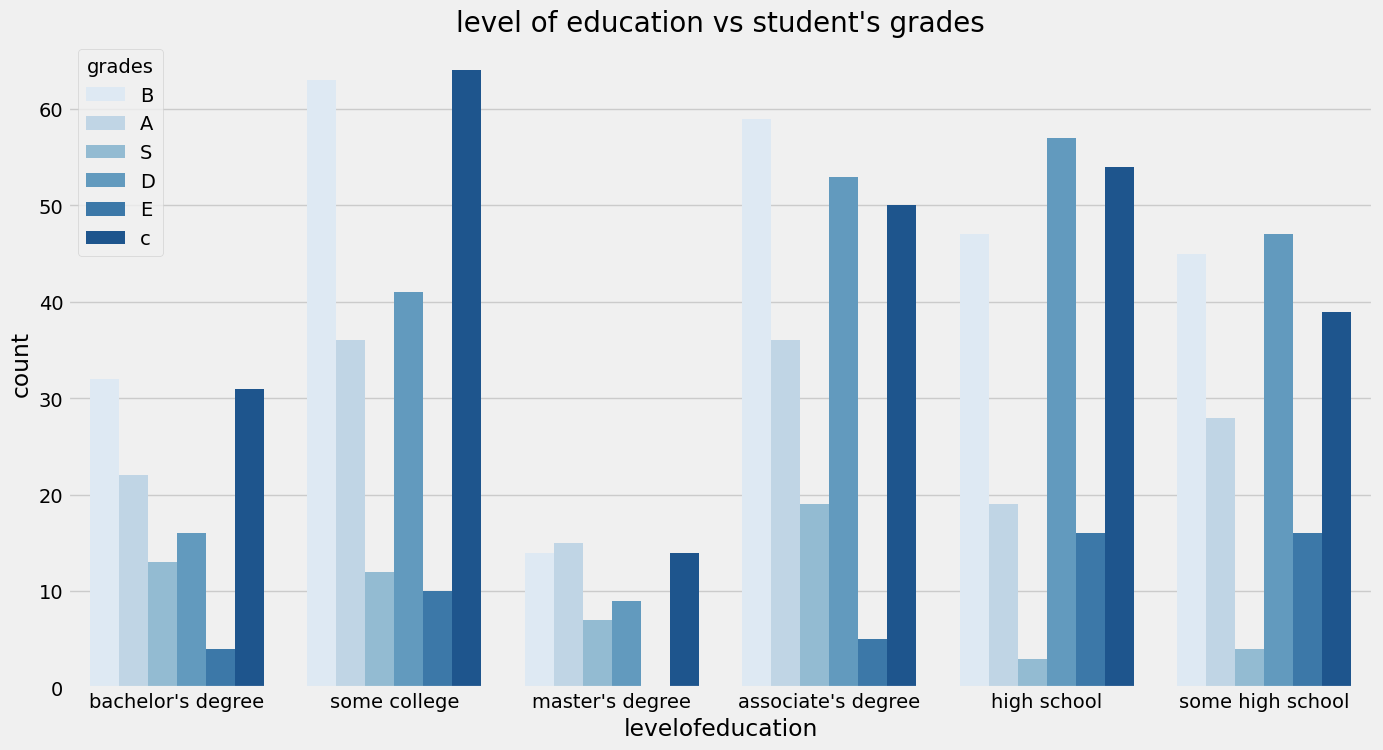

In [20]:
#compariosn of level of education and grades using seaborn
plt.rcParams["figure.figsize"]=(15,8)
sns.countplot(x=data["levelofeducation"],data=data,hue=data["grades"],palette="Blues")
plt.title("level of education vs student's grades",fontsize=20)
plt.show()

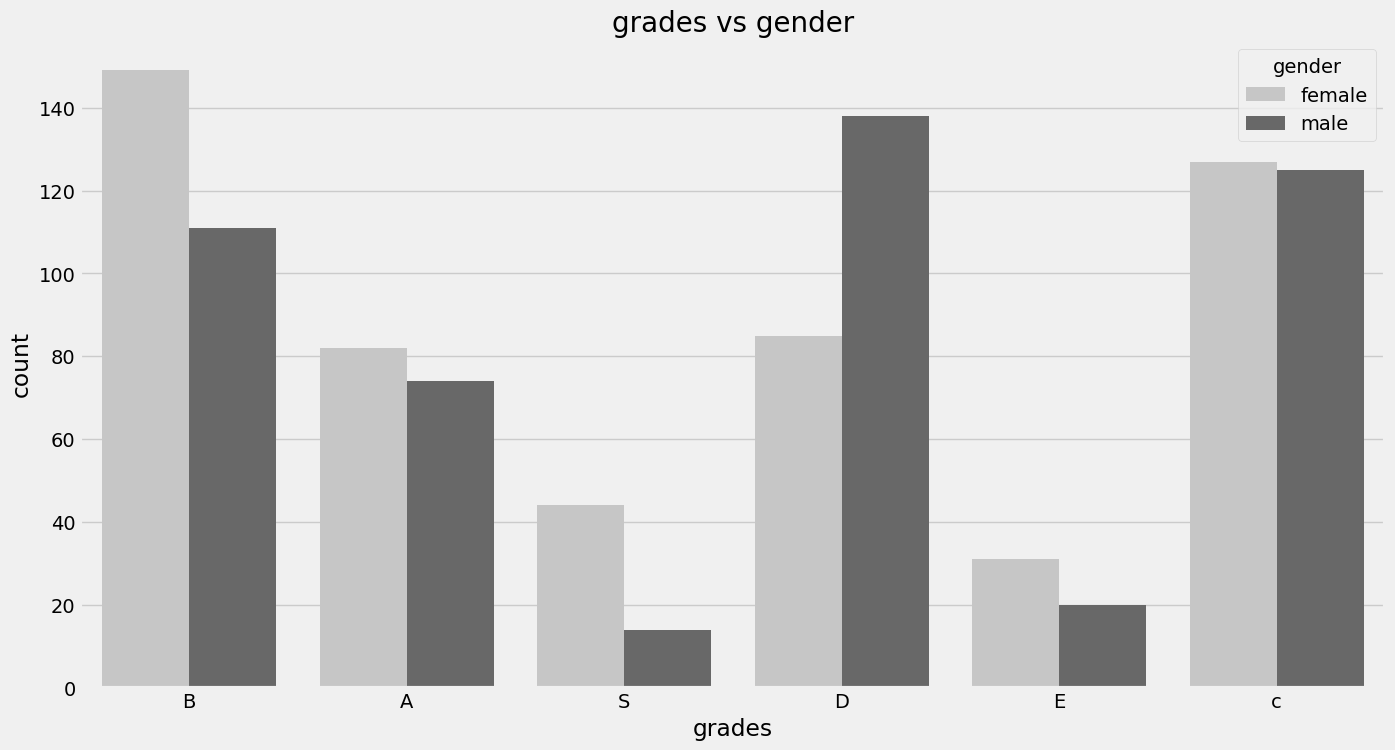

In [21]:
#comparing the distribution of grades among male and female
sns.countplot(x=data["grades"],data=data,hue=data["gender"],palette="Greys")
plt.title("grades vs gender",fontsize=20)
plt.show()


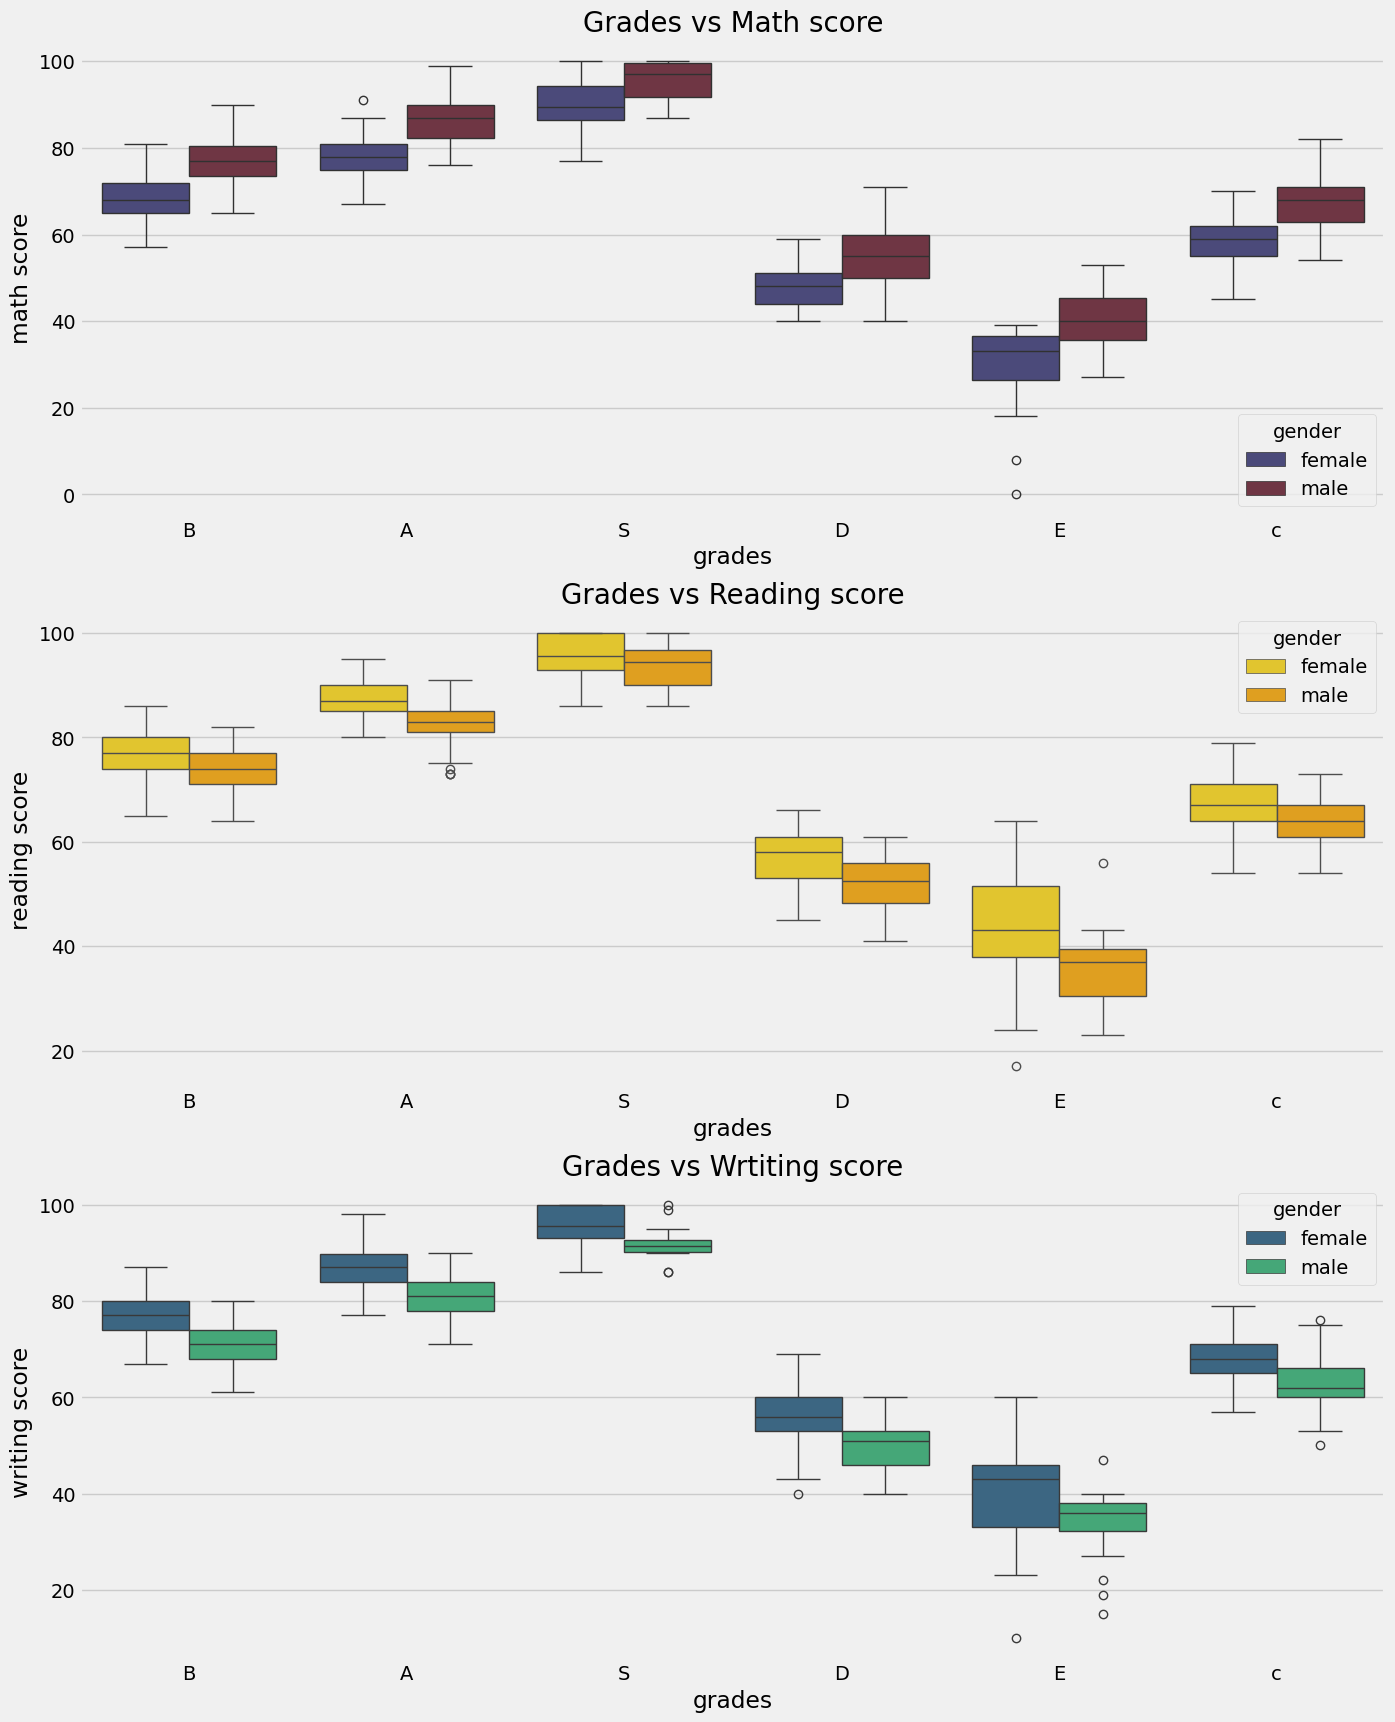

In [22]:
#comparing the score with maths,reading and writing
plt.rcParams["figure.figsize"]=(15,20)

plt.subplot(3,1,1)
sns.boxplot(x="grades",y="math score",hue="gender",data=data,palette="icefire")
plt.title("Grades vs Math score",fontsize=20)

plt.subplot(3,1,2)
sns.boxplot(x="grades",y="reading score",hue="gender",data=data,palette="Wistia")
plt.title("Grades vs Reading score",fontsize=20)

plt.subplot(3,1,3)
sns.boxplot(x="grades",y="writing score",hue="gender",data=data,palette="viridis")
plt.title("Grades vs Wrtiting score",fontsize=20)

plt.show()

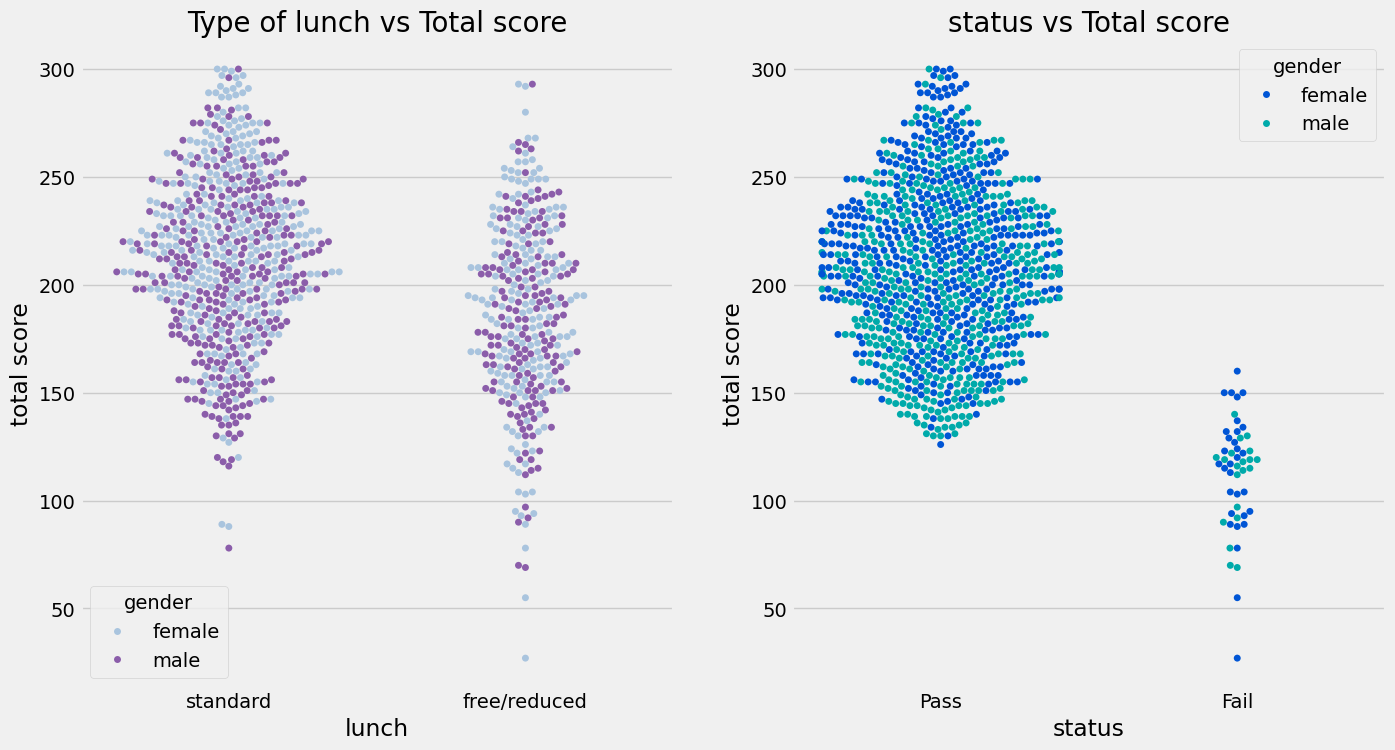

In [23]:
#lunch type vs total marks obtained by students

plt.rcParams["figure.figsize"]=(15,8)

plt.subplot(1,2,1)
sns.swarmplot(x="lunch",y="total score",hue="gender",data=data,palette="BuPu")
plt.title("Type of lunch vs Total score",fontsize=20)

plt.subplot(1,2,2)
sns.swarmplot(x="status",y="total score",hue="gender",data=data,palette="winter")
plt.title("status vs Total score",fontsize=20)

plt.show()

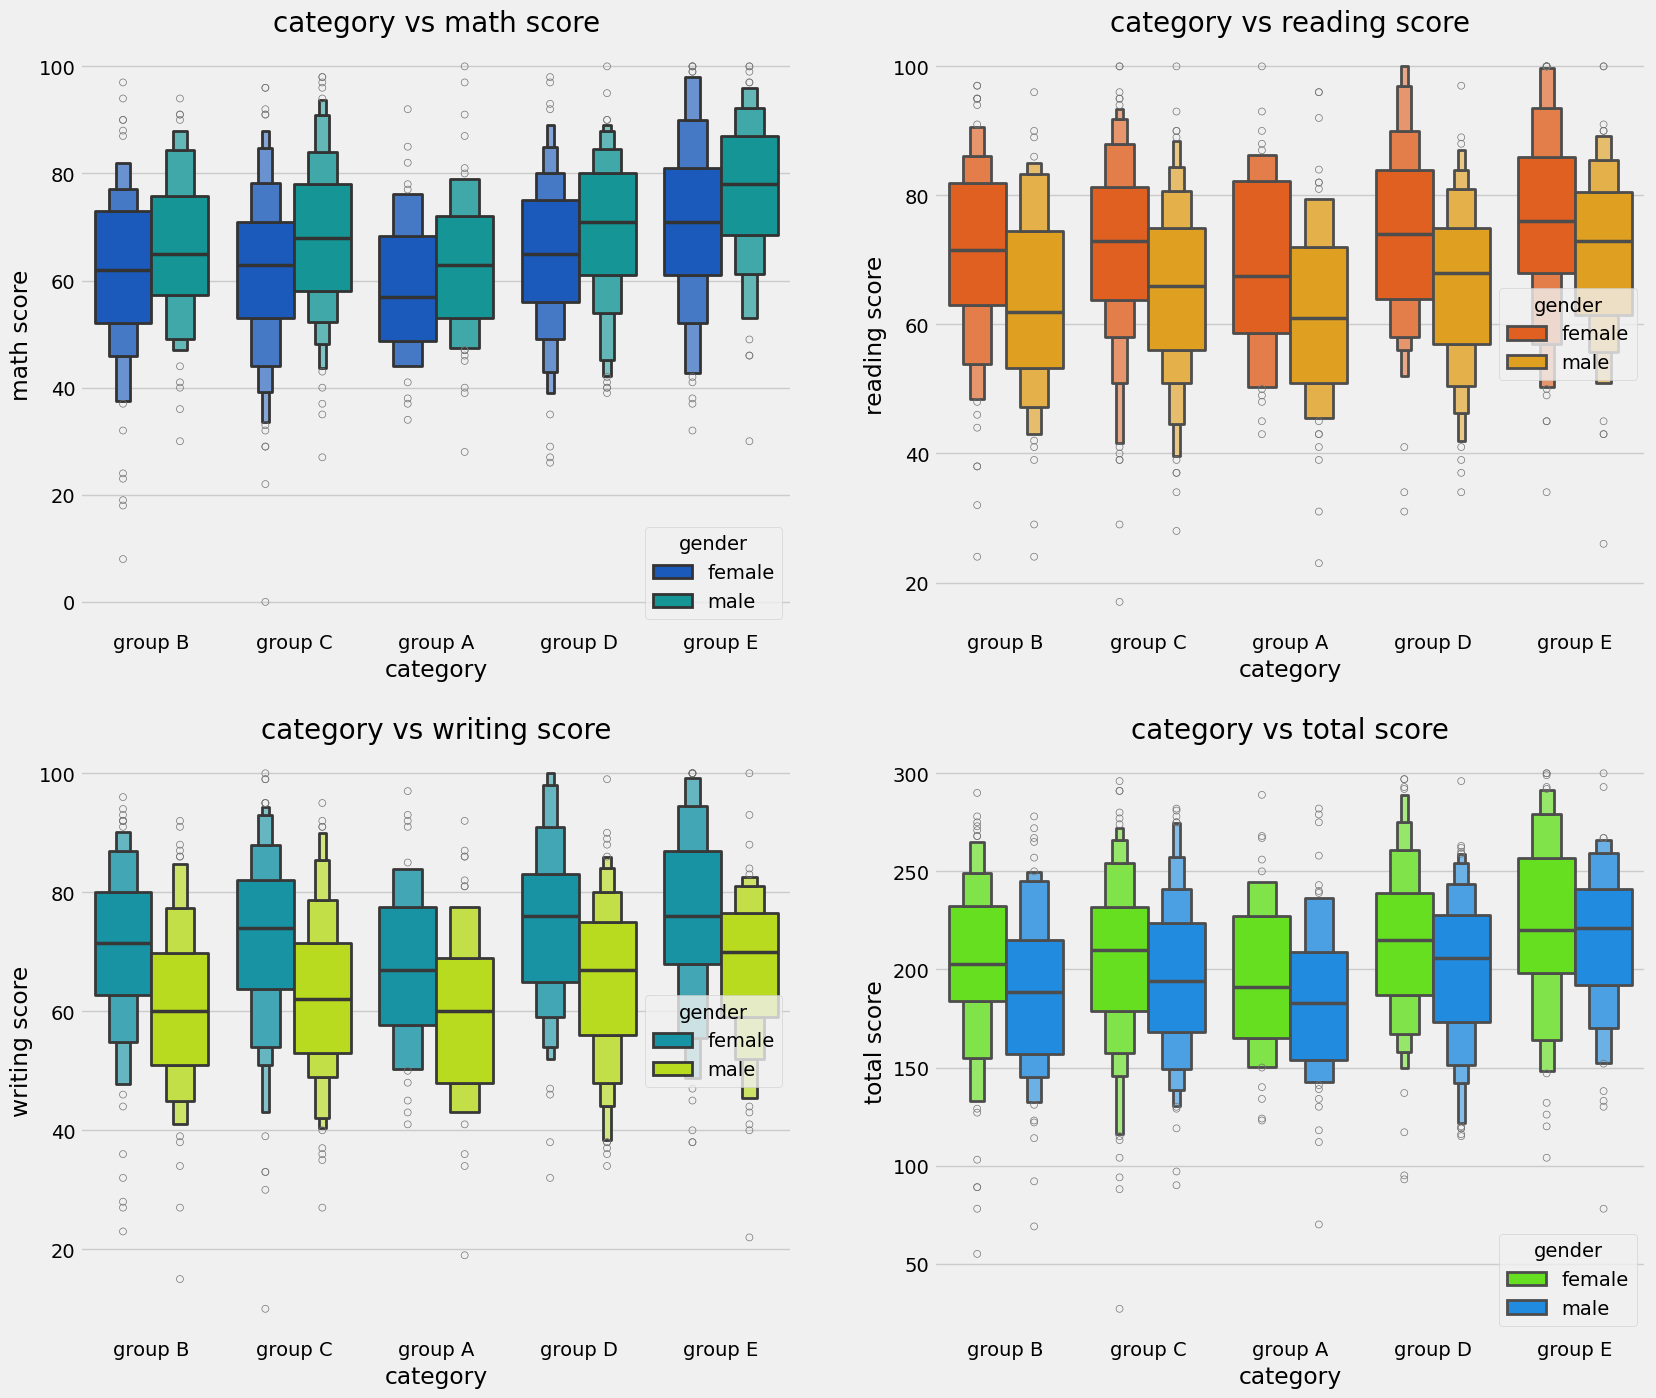

In [24]:
plt.rcParams["figure.figsize"]=(18,16)

plt.subplot(2,2,1)
sns.boxenplot(x="category",y="math score",hue="gender",data=data,palette="winter")
plt.title("category vs math score",fontsize=20)

plt.subplot(2,2,2)
sns.boxenplot(x="category",y="reading score",hue="gender",data=data,palette="autumn")
plt.title("category vs reading score",fontsize=20)

plt.subplot(2,2,3)
sns.boxenplot(x="category",y="writing score",hue="gender",data=data,palette="nipy_spectral")
plt.title("category vs writing score",fontsize=20)

plt.subplot(2,2,4)
sns.boxenplot(x="category",y="total score",hue="gender",data=data,palette="gist_rainbow")
plt.title("category vs total score",fontsize=20)

plt.show()

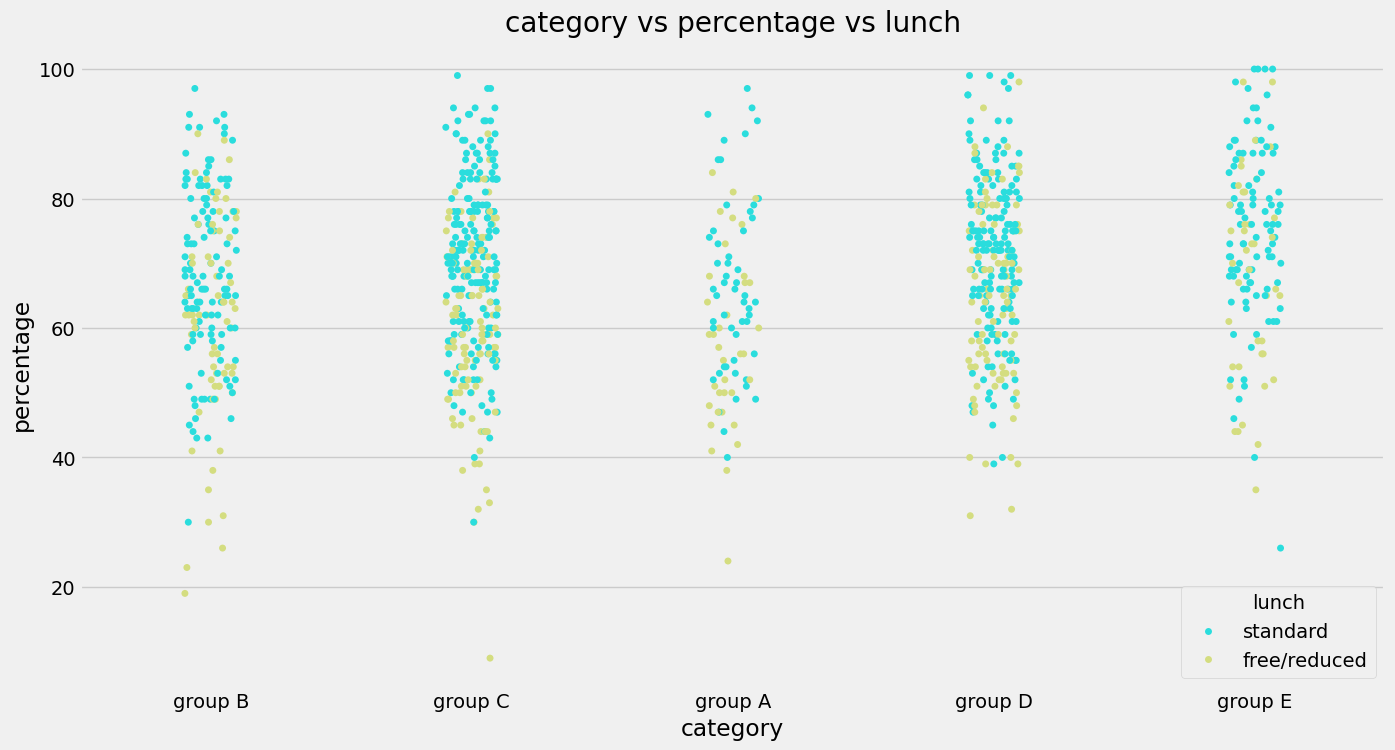

In [25]:
plt.rcParams["figure.figsize"]=(15,8)
sns.stripplot(x="category",y="percentage",hue="lunch",data=data,palette="rainbow")
plt.title("category vs percentage vs lunch")
plt.show()

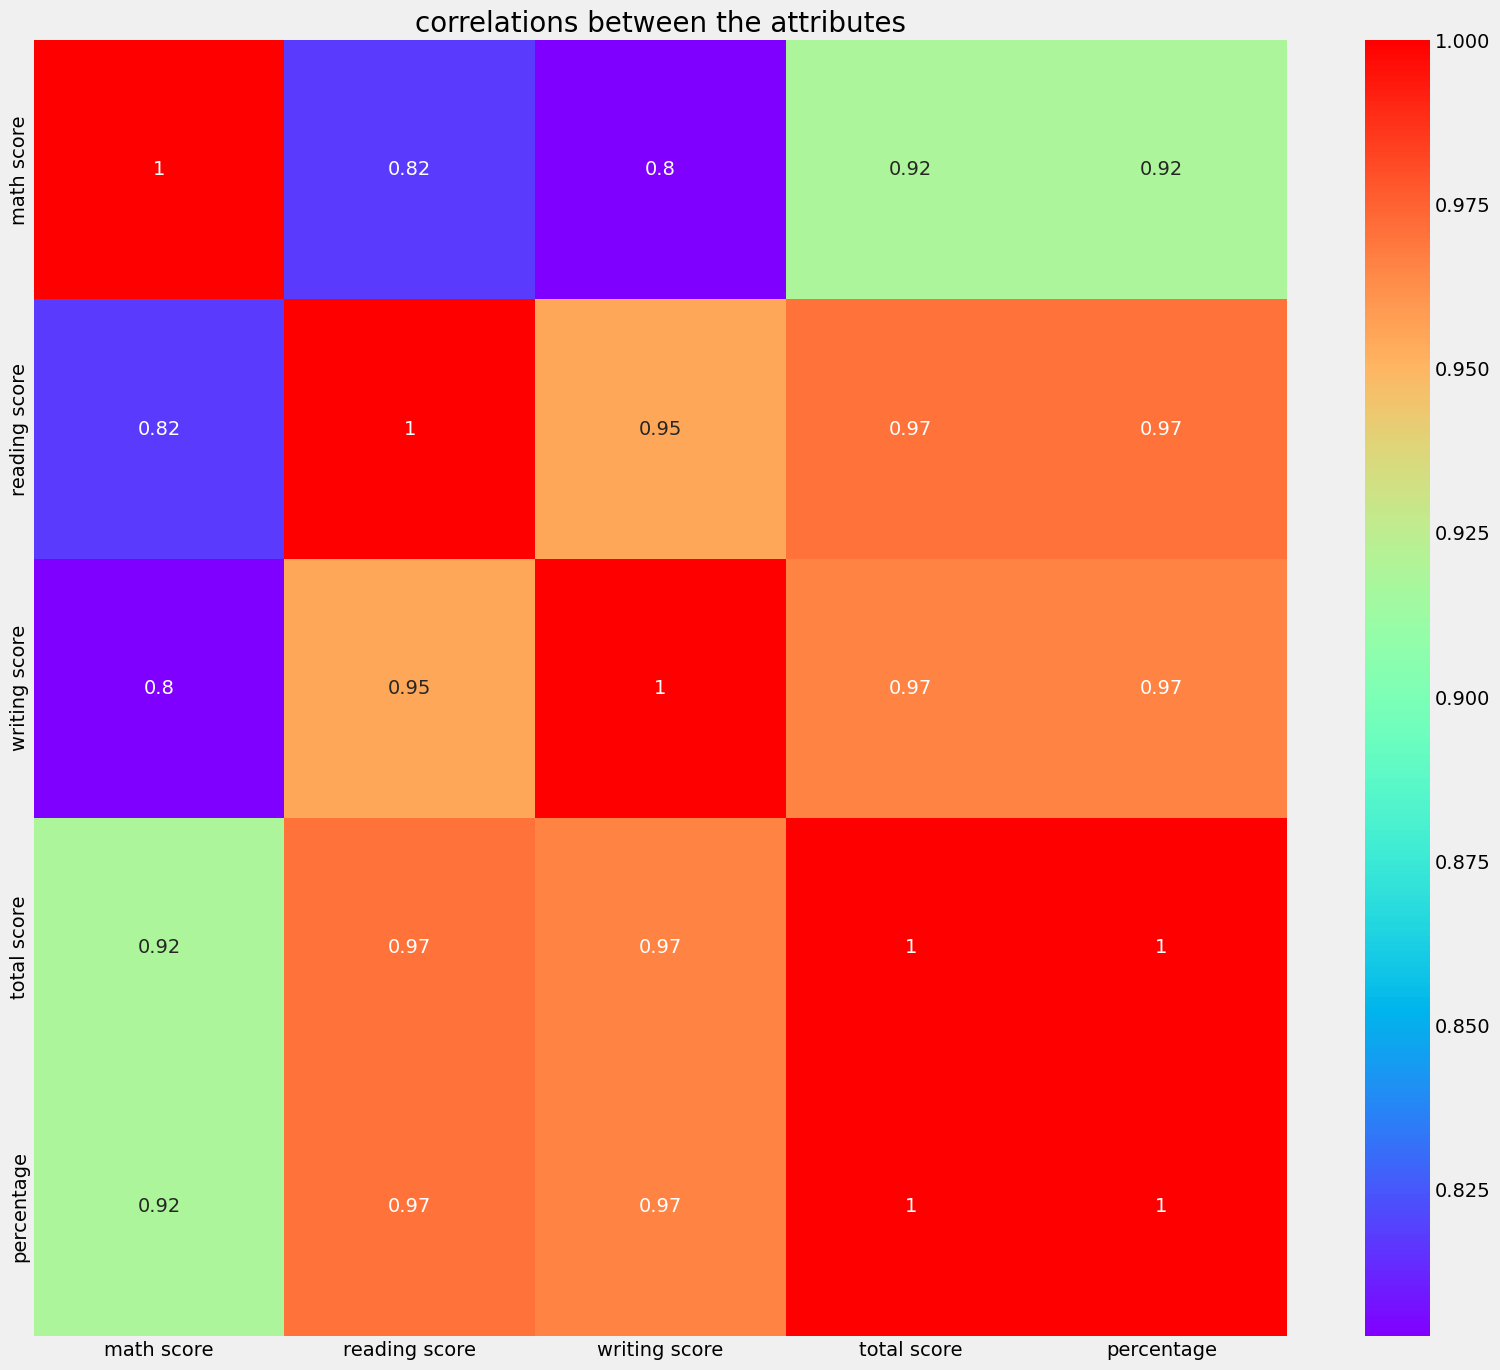

In [26]:
#heatmap
plt.rcParams["figure.figsize"]=(18,16)
numeric_data = data.select_dtypes(include=["number"])
sns.heatmap(numeric_data.corr(),cmap="rainbow",annot=True)
plt.title("correlations between the attributes",fontsize=20)
plt.show()

In [27]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["test preparation course"]=le.fit_transform(data["test preparation course"])
data["lunch"]=le.fit_transform(data["lunch"])
data["category"]=data["category"].replace("group A",1)
data["category"]=data["category"].replace("group B",2)
data["category"]=data["category"].replace("group C",3)
data["category"]=data["category"].replace("group D",4)
data["category"]=data["category"].replace("group E",5)
data["levelofeducation"]=le.fit_transform(data["levelofeducation"])
data["gender"]=le.fit_transform(data["gender"])
data["pass_in_math"]=le.fit_transform(data["pass_in_math"])
data["pass_in_reading"]=le.fit_transform(data["pass_in_reading"])
data["pass_in_writing"]=le.fit_transform(data["pass_in_writing"])
data["status"]=le.fit_transform(data["status"])
data["grades"]=data["grades"].replace("S",0)
data["grades"]=data["grades"].replace("A",1)
data["grades"]=data["grades"].replace("B",2)
data["grades"]=data["grades"].replace("C",3)
data["grades"]=data["grades"].replace("D",4)
data["grades"]=data["grades"].replace("E",5)

In [28]:
x=data.iloc[:,:14]
y=data.iloc[:,14]
print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [29]:
#spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 14)
(250, 14)
(750,)
(250,)


In [31]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# Select only numerical columns for scaling
numerical_cols = x_train.select_dtypes(include=["number"]).columns
x_train_numerical = x_train[numerical_cols]
x_test_numerical = x_test[numerical_cols]

# feeding the independent variable into the scaler
x_train_scaled = mm.fit_transform(x_train_numerical)
x_test_scaled = mm.transform(x_test_numerical)

# Optionally, replace the original columns in x_train and x_test with the scaled ones
x_train[numerical_cols] = x_train_scaled
x_test[numerical_cols] = x_test_scaled

In [32]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# creating a scaler
mm = MinMaxScaler()
le = LabelEncoder()

# Select only numerical columns for scaling
numerical_cols = x_train.select_dtypes(include=["number"]).columns
x_train_numerical = x_train[numerical_cols]
x_test_numerical = x_test[numerical_cols]

# feeding the independent variable into the scaler
x_train_scaled = mm.fit_transform(x_train_numerical)
x_test_scaled = mm.transform(x_test_numerical)

# Optionally, replace the original columns in x_train and x_test with the scaled ones
x_train[numerical_cols] = x_train_scaled
x_test[numerical_cols] = x_test_scaled

# Identify columns with string values (object dtype)
categorical_cols = x_train.select_dtypes(include=["object"]).columns

# Encode categorical columns using LabelEncoder
for col in categorical_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col]) # Use the same encoder fitted on training data

In [33]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# creating a scaler
mm = MinMaxScaler()
le = LabelEncoder()

# Select only numerical columns for scaling
numerical_cols = x_train.select_dtypes(include=["number"]).columns
x_train_numerical = x_train[numerical_cols]
x_test_numerical = x_test[numerical_cols]

# feeding the independent variable into the scaler
x_train_scaled = mm.fit_transform(x_train_numerical)
x_test_scaled = mm.transform(x_test_numerical)

# Optionally, replace the original columns in x_train and x_test with the scaled ones
x_train[numerical_cols] = x_train_scaled
x_test[numerical_cols] = x_test_scaled

# Identify columns with string values (object dtype)
categorical_cols = x_train.select_dtypes(include=["object"]).columns

# Encode categorical columns using LabelEncoder
for col in categorical_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col]) # Use the same encoder fitted on training data

# Convert y_train to a suitable format for classification
# Ensure y_train contains only strings before encoding
y_train_str = y_train.astype(str)  # Convert all values to strings
y_test_str = y_test.astype(str)   # Do the same for y_test

y_train_encoded = le.fit_transform(y_train_str) # Now encode the string version
y_test_encoded = le.transform(y_test_str) # Use the same encoder fitted on training data

from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train_encoded) # Use the encoded y_train

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train_encoded)) # Use the encoded y_train
print("Testing Accuracy :", model.score(x_test, y_test_encoded)) # Use the encoded y_test

Training Accuracy : 0.8506666666666667
Testing Accuracy : 0.816


<Axes: >

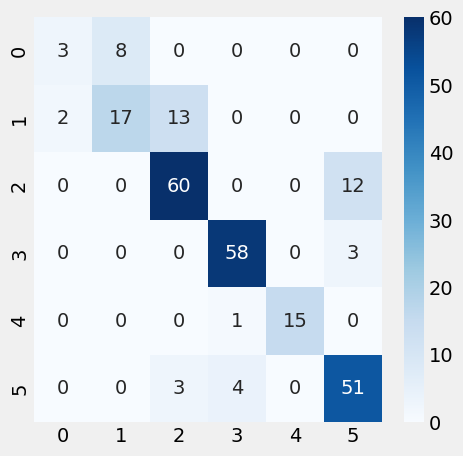

In [34]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# Ensure y_test is in the same format (encoded labels) as y_pred
y_test_encoded = le.transform(y_test.astype(str))  # Convert to string, then encode

# creating a confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)  # Use the encoded y_test

# printing the confusion matrix
plt.rcParams["figure.figsize"] = (5, 5)
sns.heatmap(cm, annot = True, cmap = "Blues")

In [35]:
from sklearn.metrics import classification_report

# Ensure y_test is in the same format (encoded labels) as y_pred
y_test_encoded = le.transform(y_test.astype(str))  # Convert to string, then encode

cr = classification_report(y_test_encoded, y_pred) # Use the encoded y_test
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.27      0.38        11
           1       0.68      0.53      0.60        32
           2       0.79      0.83      0.81        72
           3       0.92      0.95      0.94        61
           4       1.00      0.94      0.97        16
           5       0.77      0.88      0.82        58

    accuracy                           0.82       250
   macro avg       0.79      0.73      0.75       250
weighted avg       0.81      0.82      0.81       250



In [36]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# creating a model
model = RandomForestClassifier(n_estimators = 100)

# Create a LabelEncoder object
le = LabelEncoder()

# Convert y_train to strings before encoding
y_train_str = y_train.astype(str)
y_test_str = y_test.astype(str)

# Fit the encoder on y_train and transform both y_train and y_test
y_train_encoded = le.fit_transform(y_train_str) # Encode the string version of y_train
y_test_encoded = le.transform(y_test_str)

# feeding the training data to the model
# Use the encoded y_train for training
model.fit(x_train, y_train_encoded)

# predicting the x-test results
# Note: y_pred will now contain encoded labels
y_pred = model.predict(x_test)

# calculating the accuracies
# Use encoded labels for accuracy calculations
print("Training Accuracy :", model.score(x_train, y_train_encoded))
print("Testing Accuracy :", model.score(x_test, y_test_encoded))

Training Accuracy : 1.0
Testing Accuracy : 1.0


<Axes: >

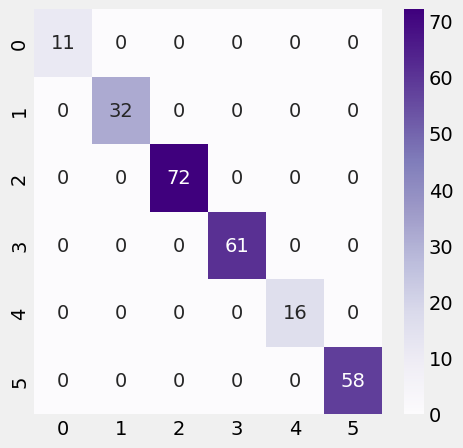

In [37]:
#printing the confusing matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test_encoded,y_pred)
plt.rcParams["figure.figsize"]=(5,5)
sns.heatmap(cm,annot=True,cmap="Purples")

In [38]:
#classification Report
from sklearn.metrics import classification_report

cr=classification_report(y_test_encoded,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        61
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        58

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [39]:
#k fold cross validation
from sklearn.model_selection import cross_val_score
# Use the encoded y_train for cross-validation
accuracies = cross_val_score(estimator=model, X=x_train, y=y_train_encoded, cv=20)
print(accuracies)
print("mean accuracy:", accuracies.mean())
print("mean standard accuracy:", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy: 1.0
mean standard accuracy: 0.0


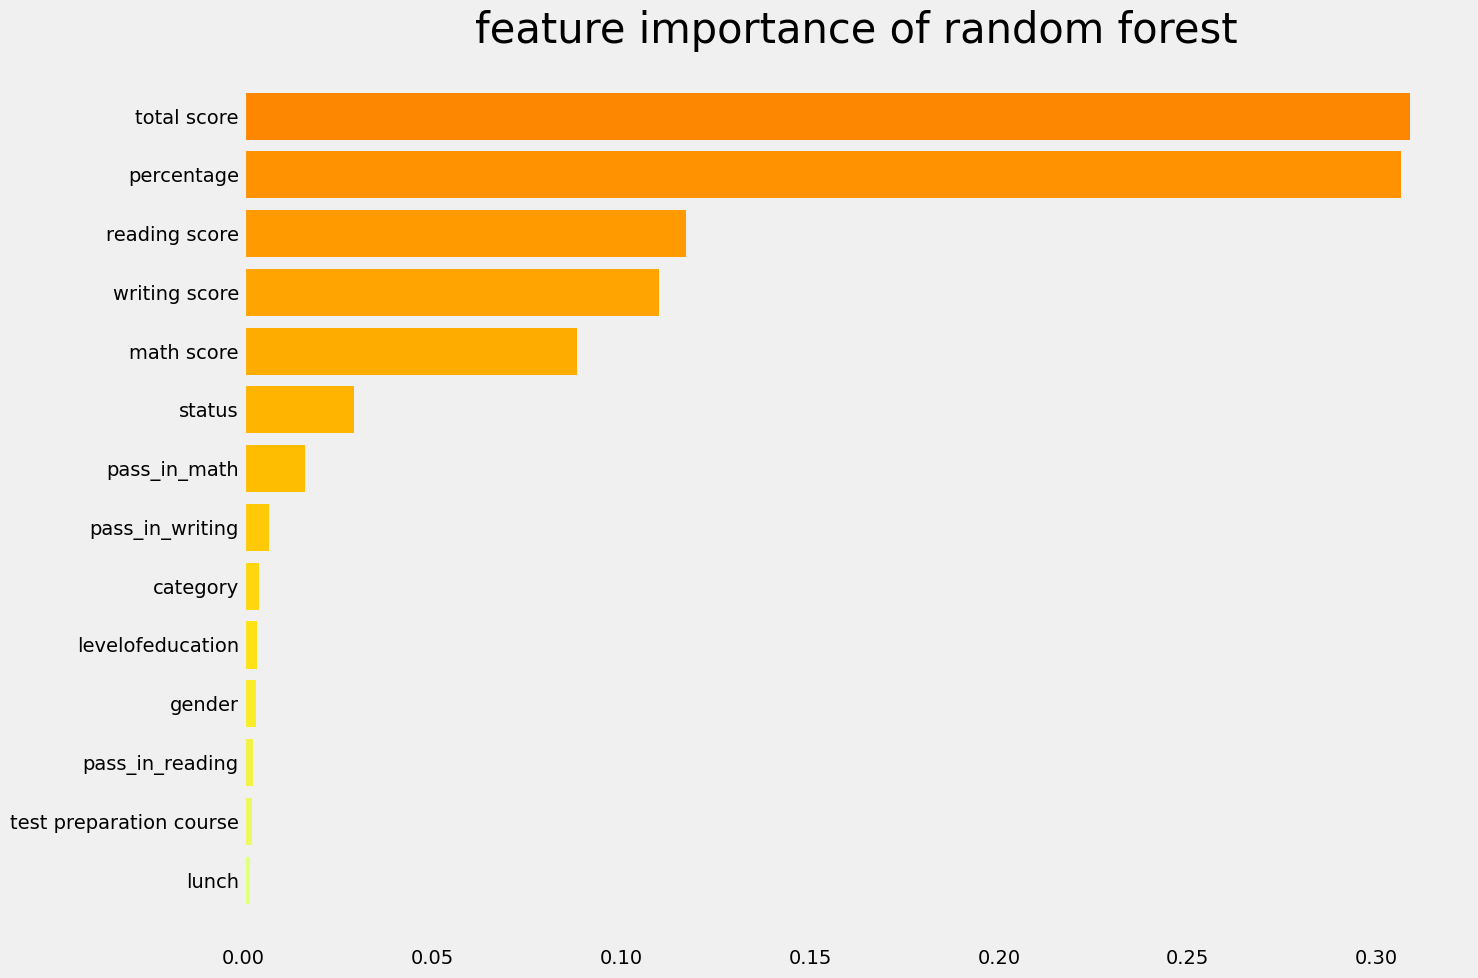

In [40]:
features=data.columns
importance=model.feature_importances_
indices=np.argsort(importance)
color=plt.cm.Wistia(np.linspace(0,1,15))

plt.rcParams["figure.figsize"]=(15,10)
plt.barh(range(len(indices)),importance[indices],color=color)
plt.yticks(range(len(indices)),features[indices])
plt.title("feature importance of random forest",fontsize=30)
plt.grid()
plt.tight_layout()
plt.show()
